<a href="https://colab.research.google.com/github/josejulianhidayat/Analisis_Sentimen_Komentar/blob/main/Analisis_Sentimen_Lanjut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pengumpulan Data

1. Periksa Separator: Coba tambahkan argumen sep saat membaca file

In [4]:
df = pd.read_csv("dataset_komentar_instagram.csv", sep=";")


2. Skip Baris Bermasalah: Jika ada baris bermasalah, Anda dapat melewatinya dengan:

In [5]:
df = pd.read_csv("dataset_komentar_instagram.csv", on_bad_lines="skip")


3. Deteksi Encoding: Jika file menggunakan encoding selain UTF-8, coba tambahkan encoding:

In [6]:
df = pd.read_csv("dataset_komentar_instagram.csv", encoding="latin1", on_bad_lines="skip")


4. Debug File CSV: Gunakan snippet berikut untuk membaca beberapa baris pertama tanpa memuat seluruh dataset

In [7]:
with open("dataset_komentar_instagram.csv", "r", encoding="utf-8") as file:
    for i in range(5):  # Menampilkan 5 baris pertama
        print(file.readline())


﻿comment_id;username;userid;label;text

18205865731294506;taufiqrahman100;6259203611;Negative;TEBANG PILIH HANYA UNTUK OPOSISI 👏

18044542370026087;coi_siwon45;57641547949;Negative;@t0p.kom3n Aamiin ya rabbal alamin 🤲

18044484197095236;torasadytia;318015623;Negative;bingung gak tu Kejagung, salah kebijakan tapi tidak memberikan keuntungan pribadi untuk Tom Lembong, kalau kebijakannya salah, lah itu semua pejabat kebijakannya salah, gimana kasus food estate? IKN? hahaha

18049045717972614;yetitaher;313460654;Negative;KASUS INI KATANYA DARI LAPORAN MASYARAKAT?? SAYA MAU MENGADU JUGA SEBAGAI MASYARAKAT AGAR KASUS INI TUNTAS USUT DARI MULAI MENDAG RAHMAT GOBEL SAMPE ZULKIFLI HASAN TERKAIT IMPORT GULA. SEKIAN



Dari output di atas, file CSV Anda menggunakan delimiter ; sebagai pemisah antar kolom. Anda dapat membaca file ini dengan menambahkan parameter sep=";" saat menggunakan pandas.read_csv. Berikut adalah perbaikan kodenya:

In [8]:
import pandas as pd

# Membaca dataset dengan delimiter ';'
file_path = "dataset_komentar_instagram.csv"  # Ganti dengan nama file Anda
df = pd.read_csv(file_path, sep=";", encoding="utf-8")

# Menampilkan beberapa baris pertama untuk memastikan data terbaca dengan benar
print(df.head())


          comment_id         username       userid     label  \
0  18205865731294506  taufiqrahman100   6259203611  Negative   
1  18044542370026087      coi_siwon45  57641547949  Negative   
2  18044484197095236      torasadytia    318015623  Negative   
3  18049045717972614        yetitaher    313460654  Negative   
4  18018004376621305    rizalrasyiiid   3746721014  Negative   

                                                text  
0                 TEBANG PILIH HANYA UNTUK OPOSISI 👏  
1               @t0p.kom3n Aamiin ya rabbal alamin 🤲  
2  bingung gak tu Kejagung, salah kebijakan tapi ...  
3  KASUS INI KATANYA DARI LAPORAN MASYARAKAT?? SA...  
4  Maaf pak, saya nggak percaya sama bapak. Nggak...  


# Data Preprocessing

**1. Data Preprocessing**

In [9]:
# Data Preprocessing
def preprocess_text(text):
    text = str(text).lower()  # Ubah ke huruf kecil
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Hapus karakter khusus
    text = re.sub(r"\s+", " ", text).strip()  # Hapus spasi berlebih
    return text

df["clean_text"] = df["text"].apply(preprocess_text)

Menampilkan data yang telah dibersihkan

In [10]:
print("\nData Setelah Preprocessing:")
print(df[["text", "clean_text"]].head())



Data Setelah Preprocessing:
                                                text  \
0                 TEBANG PILIH HANYA UNTUK OPOSISI 👏   
1               @t0p.kom3n Aamiin ya rabbal alamin 🤲   
2  bingung gak tu Kejagung, salah kebijakan tapi ...   
3  KASUS INI KATANYA DARI LAPORAN MASYARAKAT?? SA...   
4  Maaf pak, saya nggak percaya sama bapak. Nggak...   

                                          clean_text  
0                   tebang pilih hanya untuk oposisi  
1                     tpkomn aamiin ya rabbal alamin  
2  bingung gak tu kejagung salah kebijakan tapi t...  
3  kasus ini katanya dari laporan masyarakat saya...  
4  maaf pak saya nggak percaya sama bapak nggak b...  


2. Label Encoding

In [11]:
# Konversi label sentimen menjadi angka (Positive = 1, Negative = 0)
df["sentiment_label"] = df["label"].map({"Positive": 1, "Negative": 0})

# Memastikan bahwa label sudah terkonversi
print("\nLabel Setelah Encoding:")
print(df[["label", "sentiment_label"]].head())



Label Setelah Encoding:
      label  sentiment_label
0  Negative                0
1  Negative                0
2  Negative                0
3  Negative                0
4  Negative                0


# TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_text"])  # Representasi teks dalam bentuk vektor
y = df["sentiment_label"]

# Data Spliting

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% data latih, 30% data uji
model = MultinomialNB()  # Model Naive Bayes
model.fit(X_train, y_train)  # Melatih model dengan data latih

MultinomialNB()

# EVALUASI MODEL

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)  # Prediksi data uji
accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi model
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")


Akurasi Model: 90.48%


In [15]:
# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       228
           1       0.00      0.00      0.00        24

    accuracy                           0.90       252
   macro avg       0.45      0.50      0.47       252
weighted avg       0.82      0.90      0.86       252



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[228   0]
 [ 24   0]]


# VISUALISASI

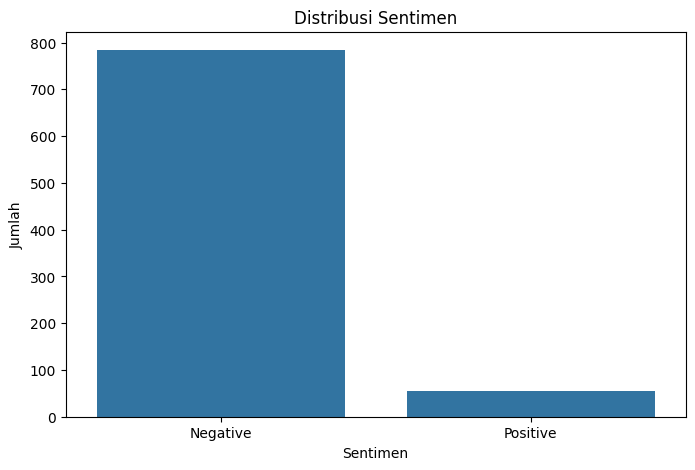

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["label"])
plt.title("Distribusi Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()


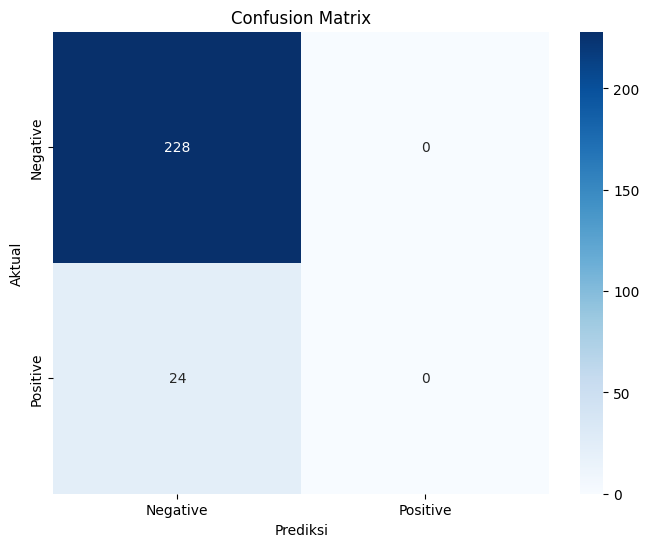

In [18]:
# Heatmap Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Analisis Lanjutan

**1. Hyperparameter Tunning**

In [22]:
# Optimasi Naive Bayes dengan Grid Search
from sklearn.model_selection import GridSearchCV

# Definisi parameter yang akan diuji
param_grid = {'alpha': [0.1, 0.5, 1, 5, 10]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print("\nModel Terbaik dengan Grid Search:", best_model)

# Evaluasi model terbaik
y_pred_optimized = best_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Akurasi Model Terbaik: {optimized_accuracy * 100:.2f}%")



Model Terbaik dengan Grid Search: MultinomialNB(alpha=0.5)
Akurasi Model Terbaik: 90.48%


**2. Eksplorasi Kata Penting / Probabilitas Kata Sering Muncul**

In [26]:
# Menentukan jumlah fitur/kata penting teratas yang ingin ditampilkan
top_features = 20  # Misalnya, tampilkan 20 kata paling penting

# Mendapatkan daftar nama fitur (kata-kata) dari TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Mengambil log probabilitas fitur dari model
feature_log_prob = best_model.feature_log_prob_

# Fitur paling penting untuk sentimen Positive
positive_features = sorted(zip(feature_log_prob[1], feature_names), reverse=True)[:top_features]
print("\nKata-Kata Penting untuk Sentimen Positive:")
for coef, word in positive_features:
    print(f"{word}: {coef:.4f}")

# Fitur paling penting untuk sentimen Negative
negative_features = sorted(zip(feature_log_prob[0], feature_names), reverse=True)[:top_features]
print("\nKata-Kata Penting untuk Sentimen Negative:")
for coef, word in negative_features:
    print(f"{word}: {coef:.4f}")



Kata-Kata Penting untuk Sentimen Positive:
kejagung: -6.2529
up: -6.2831
ditoradhyaa: -6.5160
hukum: -6.7912
dukung: -6.8163
kita: -6.8476
bersih: -6.8943
tpkomn: -6.8952
tos: -6.9427
gass: -6.9427
gaspoel: -6.9427
lain: -6.9975
gas: -7.0280
poll: -7.0419
menyalaaa: -7.0419
dong: -7.0466
keren: -7.0522
aminnn: -7.0526
aminamin: -7.0526
zulhas: -7.0597

Kata-Kata Penting untuk Sentimen Negative:
yg: -5.1667
aamiin: -5.2209
di: -5.4025
ada: -5.6448
pak: -5.6670
tpkomn: -5.6760
ini: -5.7252
ya: -5.7383
dan: -5.7966
tom: -5.9151
itu: -5.9357
yang: -5.9407
kasus: -5.9706
kejaksaanri: -5.9866
aja: -6.0672
juga: -6.1084
ga: -6.1337
nya: -6.1627
baru: -6.1680
bukti: -6.1779


**3. Analisis Distribusi Kata : Word Cloud**

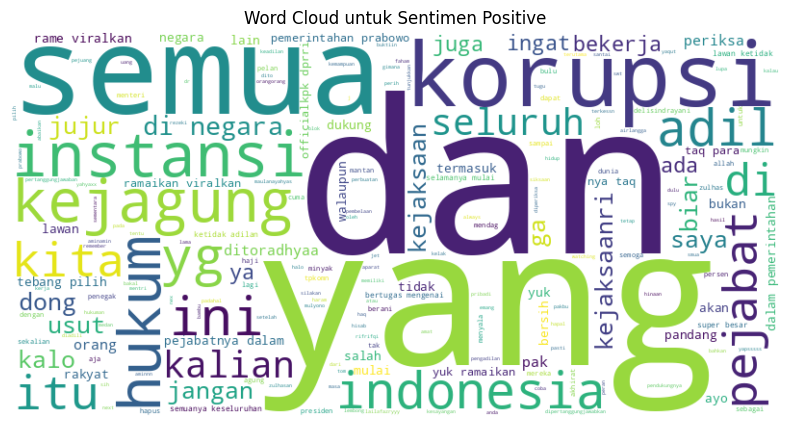

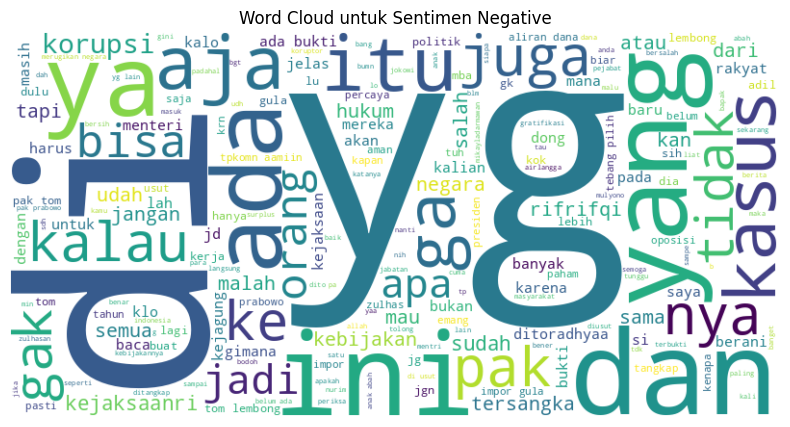

In [27]:
from wordcloud import WordCloud

# Word cloud untuk sentimen Positive
positive_text = " ".join(df[df["label"] == "Positive"]["clean_text"])
positive_wc = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(10, 5))
plt.title("Word Cloud untuk Sentimen Positive")
plt.imshow(positive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Word cloud untuk sentimen Negative
negative_text = " ".join(df[df["label"] == "Negative"]["clean_text"])
negative_wc = WordCloud(width=800, height=400, background_color="white").generate(negative_text)

plt.figure(figsize=(10, 5))
plt.title("Word Cloud untuk Sentimen Negative")
plt.imshow(negative_wc, interpolation="bilinear")
plt.axis("off")
plt.show()


**4. Evaluasi K-Fold Cross-Validation**

In [28]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=10, scoring='accuracy')
print(f"\nAkurasi rata-rata dengan Cross Validation: {cv_scores.mean() * 100:.2f}%")



Akurasi rata-rata dengan Cross Validation: 93.33%


**5. Menambahkan Sentimen Netral**

In [29]:
df["sentiment_label"] = df["label"].map({"Positive": 1, "Negative": 0, "Neutral": 2})

# Pastikan TF-IDF dan model diupdate untuk menangani kelas netral
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_text"])
y = df["sentiment_label"]

# Pelatihan ulang model dengan data netral
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluasi ulang
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model dengan Sentimen Netral: {accuracy * 100:.2f}%")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))



Akurasi Model dengan Sentimen Netral: 90.48%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       228
           1       0.00      0.00      0.00        24

    accuracy                           0.90       252
   macro avg       0.45      0.50      0.47       252
weighted avg       0.82      0.90      0.86       252



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**6. Clustering Komentar**

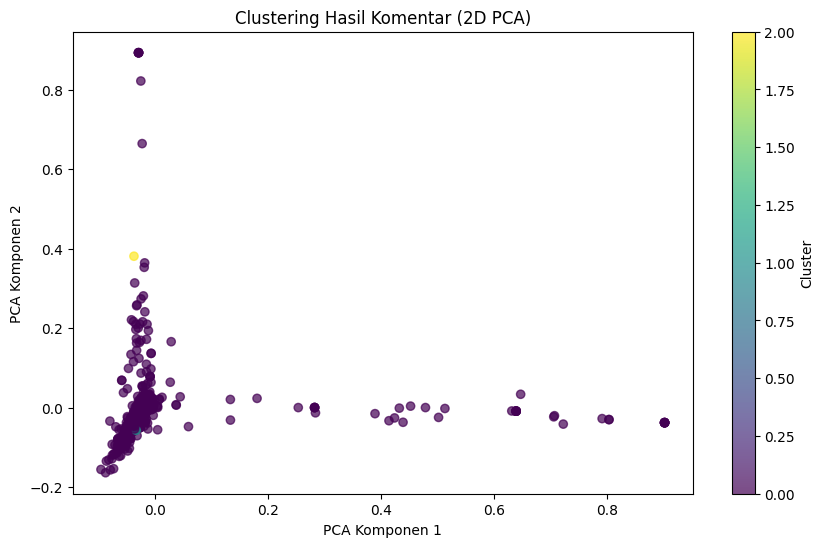

In [30]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# K-Means Clustering
num_clusters = 3  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X.toarray())

# Menambahkan hasil clustering ke dataset
df["cluster"] = clusters

# Visualisasi dengan PCA (2D Plot)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("Clustering Hasil Komentar (2D PCA)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.colorbar(label="Cluster")
plt.show()


**7. Eksperimen dengan Model SVM**

In [31]:
from sklearn.svm import LinearSVC

# Model SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Evaluasi Model SVM
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nAkurasi Model SVM: {svm_accuracy * 100:.2f}%")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_svm))



Akurasi Model SVM: 90.87%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       228
           1       0.60      0.12      0.21        24

    accuracy                           0.91       252
   macro avg       0.76      0.56      0.58       252
weighted avg       0.88      0.91      0.88       252



**8. Mencari Komentar Paling Positif dan Negativ**

In [32]:
# Probabilitas prediksi dari model
probabilities = model.predict_proba(X_test)

# Komentar paling positif dan paling negatif
most_positive_index = probabilities[:, 1].argmax()
most_negative_index = probabilities[:, 0].argmax()

print("\nKomentar Paling Positif:")
print(df.iloc[most_positive_index]["text"])

print("\nKomentar Paling Negatif:")
print(df.iloc[most_negative_index]["text"])



Komentar Paling Positif:
@rif_rifqi_1717  minim literasi oreg warteg 😂

Komentar Paling Negatif:
@ditoradhyaa nahh. .up🔥


**10. Menyimpan Model**

In [33]:
import joblib

# Save model dan TF-IDF vectorizer
joblib.dump(best_model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("Model dan vectorizer telah disimpan.")


Model dan vectorizer telah disimpan.


In [35]:
# Load model dan vectorizer
loaded_model = joblib.load("sentiment_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Prediksi komentar baru
new_comment = ["Pengiriman cepat sekali, sangat memuaskan!"]
new_comment_vectorized = loaded_vectorizer.transform(new_comment)
prediction = loaded_model.predict(new_comment_vectorized)
print(f"Prediksi Sentimen: {'Positive' if prediction[0] == 1 else 'Negative'}")


Prediksi Sentimen: Negative


**11. Menghitung Sentimen Pengguna**


Distribusi Sentimen Berdasarkan Pengguna:
label            Negative  Positive
username                           
nampaw14              1.0       4.0
andriyan_syah16       8.0       4.0
dani_ramdhan09        0.0       1.0
delluna168            0.0       1.0
afriliameika          0.0       1.0


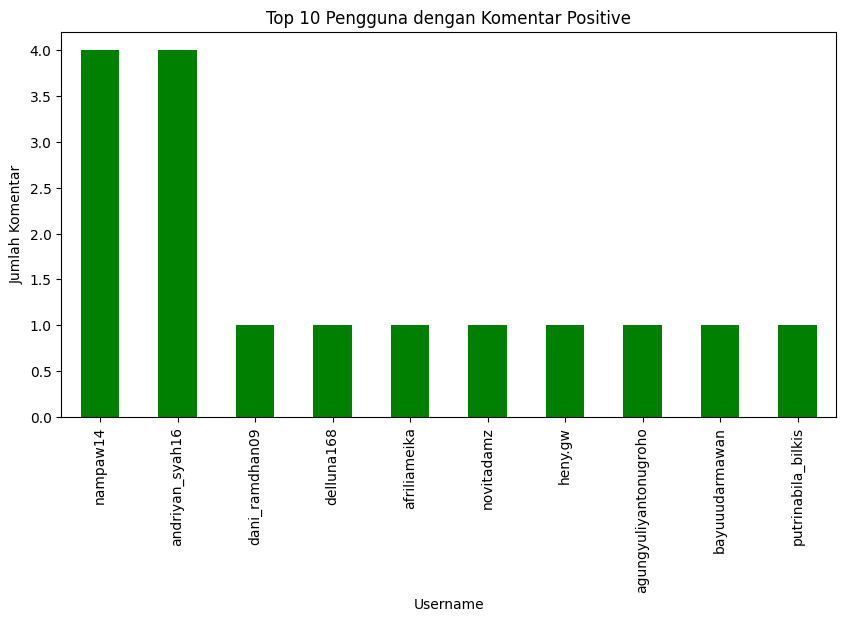

In [36]:
# Hitung jumlah sentimen per pengguna
sentiment_per_user = df.groupby(["username", "label"]).size().unstack()
sentiment_per_user.fillna(0, inplace=True)  # Mengisi NaN dengan 0
sentiment_per_user.sort_values(by="Positive", ascending=False, inplace=True)  # Urutkan berdasarkan sentimen positif

print("\nDistribusi Sentimen Berdasarkan Pengguna:")
print(sentiment_per_user.head())

# Visualisasi pengguna dengan komentar positif terbanyak
sentiment_per_user["Positive"].head(10).plot(kind="bar", figsize=(10, 5), color="green")
plt.title("Top 10 Pengguna dengan Komentar Positive")
plt.xlabel("Username")
plt.ylabel("Jumlah Komentar")
plt.show()


**12. Mencari Spesifik Kata Analisis**


Distribusi Sentimen untuk Kata 'tebang pilih':
label
Negative    19
Positive     3
Name: count, dtype: int64


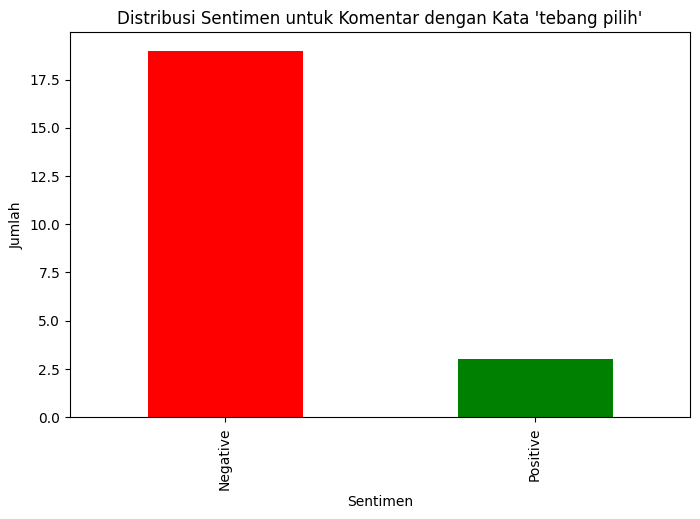

In [46]:
# Cari semua komentar yang mengandung kata "bagus"
keyword = "tebang pilih"
keyword_comments = df[df["clean_text"].str.contains(keyword)]

# Distribusi sentimen untuk komentar yang mengandung kata "bagus"
print(f"\nDistribusi Sentimen untuk Kata '{keyword}':")
print(keyword_comments["label"].value_counts())

# Visualisasi
keyword_comments["label"].value_counts().plot(kind="bar", figsize=(8, 5), color=["red", "green"])
plt.title(f"Distribusi Sentimen untuk Komentar dengan Kata '{keyword}'")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()


**13. Korelasi Kata Sentimen**

In [51]:
from gensim.models import Word2Vec

# Tokenisasi teks
tokenized_texts = df["clean_text"].apply(lambda x: x.split())

# Latih model Word2Vec
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)

# Cari kata yang paling mirip dengan "bagus"
print("\nKata-Kata Mirip dengan 'bagus':")
print(w2v_model.wv.most_similar("bagus", topn=10))



Kata-Kata Mirip dengan 'bagus':
[('kalimat', 0.4279695451259613), ('erlangga', 0.39497363567352295), ('masuk', 0.376351535320282), ('hell', 0.36837416887283325), ('gk', 0.36613351106643677), ('kenapa', 0.3612147867679596), ('katakan', 0.35944923758506775), ('waktu', 0.35731542110443115), ('tahun', 0.35427120327949524), ('maen', 0.35160160064697266)]


**14. Skor Polaritas Komentar**

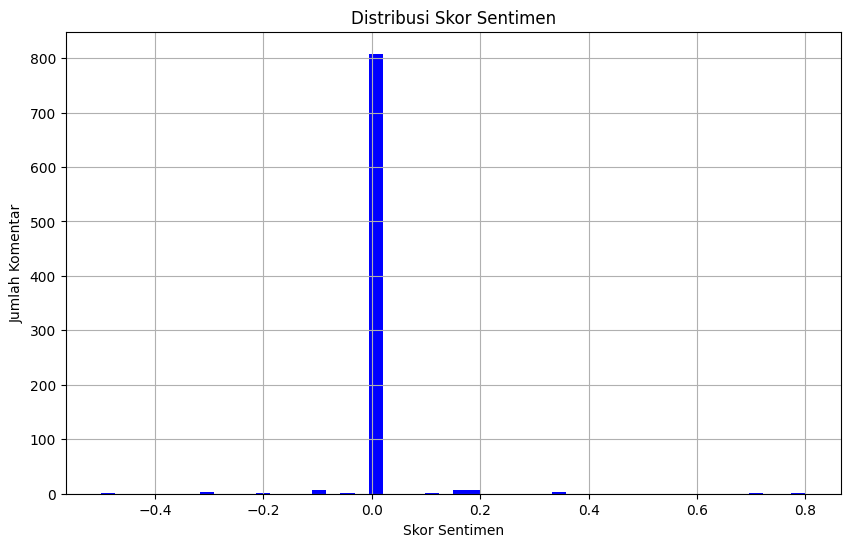

In [52]:
from textblob import TextBlob

# Hitung skor polaritas untuk setiap komentar
df["sentiment_score"] = df["clean_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Kategorikan skor polaritas menjadi positif, negatif, atau netral
df["sentiment_category"] = df["sentiment_score"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)

# Visualisasi distribusi skor polaritas
df["sentiment_score"].hist(bins=50, figsize=(10, 6), color="blue")
plt.title("Distribusi Skor Sentimen")
plt.xlabel("Skor Sentimen")
plt.ylabel("Jumlah Komentar")
plt.show()


**15. Distribusi Sentimen berdasarkan panjang komentar**

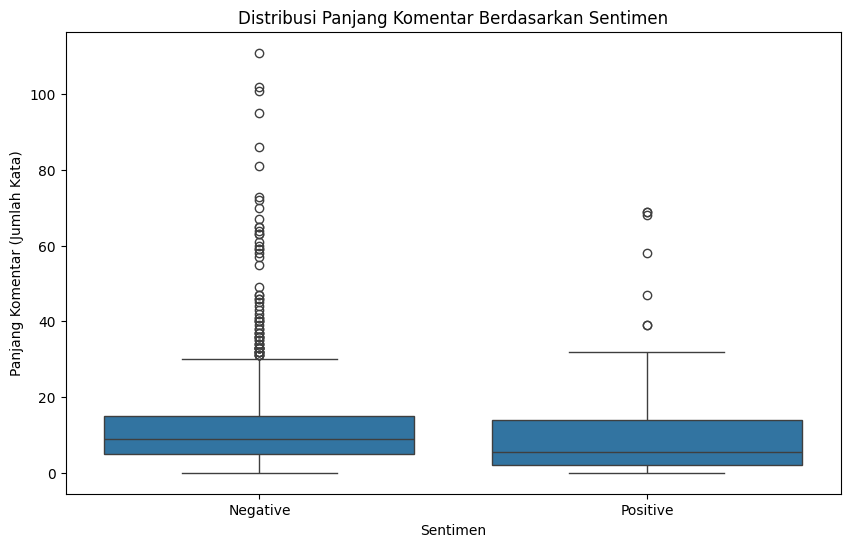

In [53]:
# Hitung panjang komentar
df["comment_length"] = df["clean_text"].apply(lambda x: len(x.split()))

# Distribusi panjang komentar berdasarkan sentimen
plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="comment_length", data=df)
plt.title("Distribusi Panjang Komentar Berdasarkan Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Panjang Komentar (Jumlah Kata)")
plt.show()


**17. Plot ROC Curve**

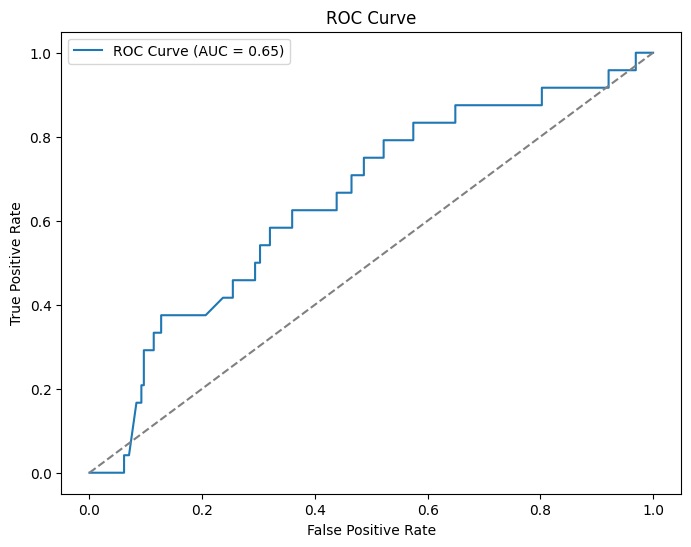

In [54]:
from sklearn.metrics import roc_curve, auc

# Hitung probabilitas prediksi
y_proba = best_model.predict_proba(X_test)[:, 1]

# Hitung TPR dan FPR
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Garis diagonal
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
